In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv("Housing_Price_Data.csv")
print(df)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [31]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [32]:
df_clean = df.dropna()

In [33]:
df_clean = df.dropna(how='all')


In [34]:
# Check for duplicates
print(f"Total duplicates: {df.duplicated().sum()}")

Total duplicates: 0


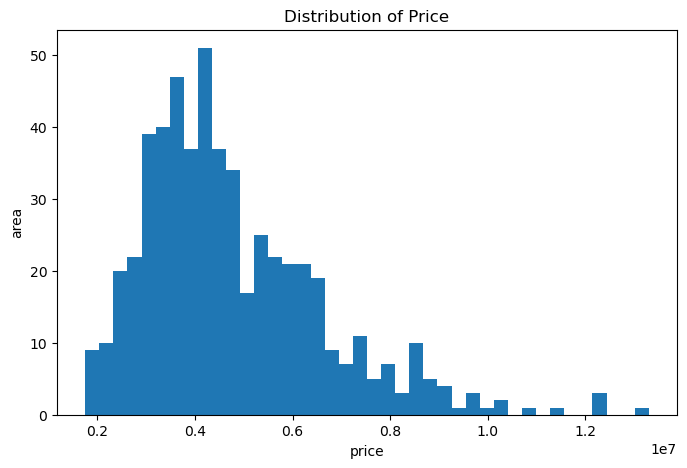

In [35]:
plt.figure(figsize=(8,5))
plt.hist(df['price'], bins=40)
plt.xlabel('price')
plt.ylabel('area')
plt.title('Distribution of Price')
plt.show()

In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


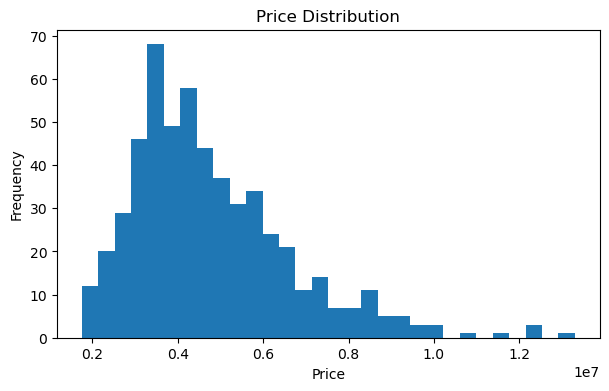

In [37]:
plt.figure(figsize=(7,4))
plt.hist(df['price'], bins=30)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

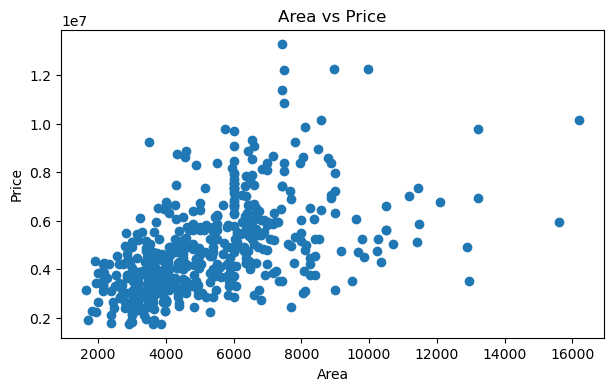

In [38]:
plt.figure(figsize=(7,4))
plt.scatter(df['area'], df['price'])
plt.title("Area vs Price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

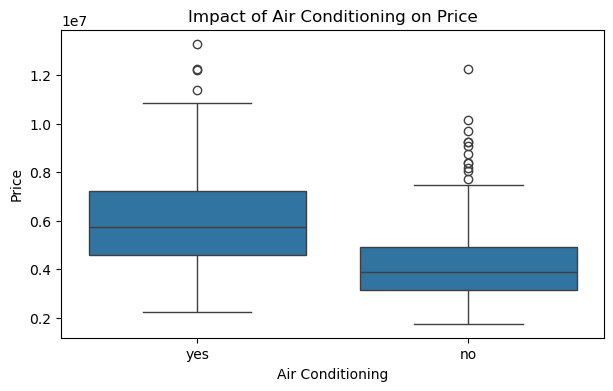

In [39]:
plt.figure(figsize=(7,4))
sns.boxplot(x=df['airconditioning'], y=df['price'])
plt.title("Impact of Air Conditioning on Price")
plt.xlabel("Air Conditioning")
plt.ylabel("Price")
plt.show()

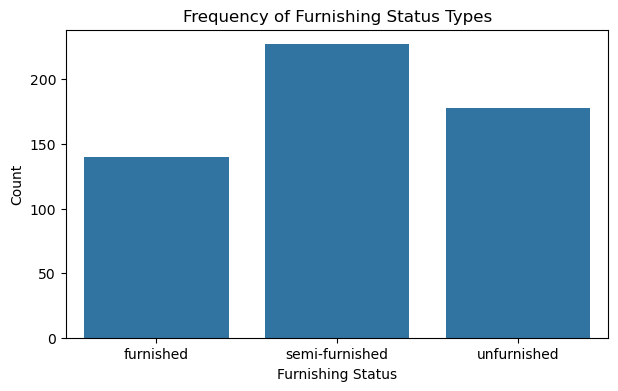

In [40]:
plt.figure(figsize=(7,4))
sns.countplot(x=df['furnishingstatus'])
plt.title("Frequency of Furnishing Status Types")
plt.xlabel("Furnishing Status")
plt.ylabel("Count")
plt.show()

In [42]:
label_cols = ["mainroad","guestroom","basement","hotwaterheating",
              "airconditioning","prefarea","furnishingstatus"]

df_encoded = df.copy()
le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [43]:
X = df_encoded.drop("price", axis=1)
y = df_encoded["price"]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [45]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=400,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=400, n_jobs=-1, random_state=42)

In [46]:
from sklearn.metrics import mean_absolute_error, r2_score

preds = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, preds))
print("R²:", r2_score(y_test, preds))

MAE: 1016404.126949541
R²: 0.6174747024063652


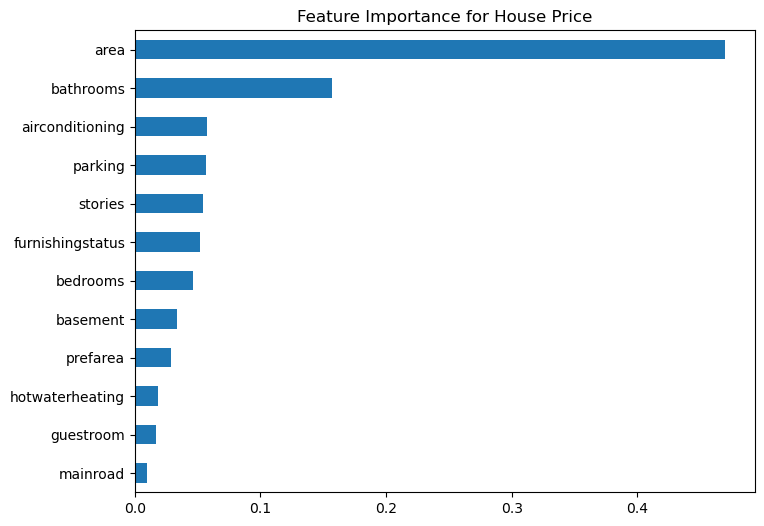

In [47]:
import matplotlib.pyplot as plt

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance for House Price")
plt.show()